In [1]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']# 用来正常显示中文标签
from datetime import datetime

# 1.初识数据

In [2]:
df = pd.read_csv('kelu.csv')
df.info()
# 基本信息：门票价格101，数据来自16年~19年，8K+多数据量
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


,author,rating,time,year,amount,frequency
0,YOUNG,60,2019/2/28,2019,110,1
1,SHING YAN,100,2019/2/28,2019,110,1
2,Sha,60,2019/2/28,2019,110,1
3,Mary Mae,100,2019/2/28,2019,110,1
4,Maria Cristina,100,2019/2/28,2019,110,1


In [3]:
df.describe()
#根据平均分92，和1/2分位得知，大多数用户评分在100，效果非常不错。
#16年~19年门票价格都是110


,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


# 2.分析数据

## a1.每天销量分析

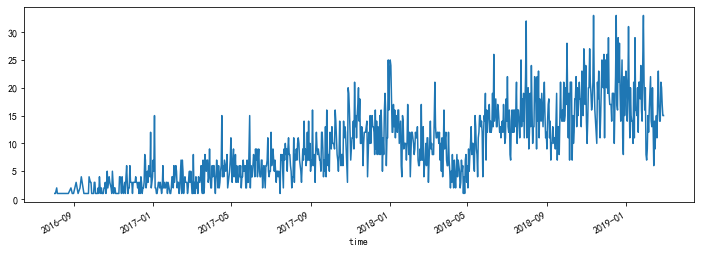

In [4]:
df['time'] = pd.to_datetime(df['time'],format='%Y/%m/%d')
df.groupby('time')['rating'].count().plot(figsize=(12,4))
#整体来看每日销量呈现上升趋势，但是在18年5月份前后（2，3，4）出现一次较大的波动，销量急剧下滑，猜测：台风，疫情，运营推广不利
#16年9月~17年1月，销量非常低，每天平均2-3张门票，猜测：101观景台门票刚刚上线发售，观景台刚刚对游客进行开放

## a2.每月销量分析

Text(0.5, 1.0, '16~19年每月销量分析')

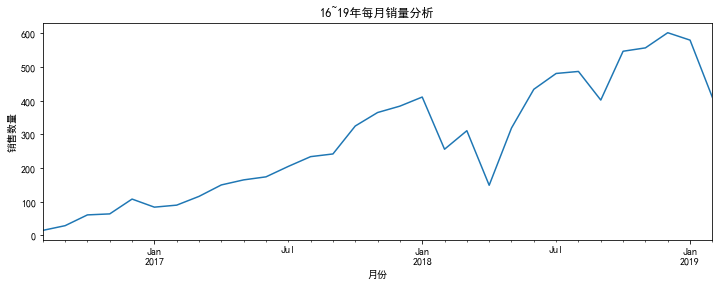

In [5]:
df['month'] = df['time'].values.astype('datetime64[M]')  #保留月份精度的日期
df.head()
df.groupby('month')['rating'].count().plot(figsize=(12,4))  #按照月份进度进行计数
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16~19年每月销量分析')
#月份整体销量依然呈现上升趋势，但是在18年2，3，4月份月销量下滑明显。跟每天销量下降有关。猜测：台风，疫情，运营推广不利

## a3.每个用户的购买量和消费金额分析

In [6]:
#merge用法，相当于sql当中join：
df1 = pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2 =  pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90],
    'group':['C','D']
})
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2'])
#left：左表   right:右表   on：关联字段 how：inner（默认值，交集）|outer（并集）|left（只保留左侧）|right（只保留右侧）
#suffixes:如果两个表中有多个相同列，用suffixes给的值进行区分(默认值xy)

,name,group_1,score,group_2
0,lisi,B,90,D


Text(0, 0.5, '消费金额')

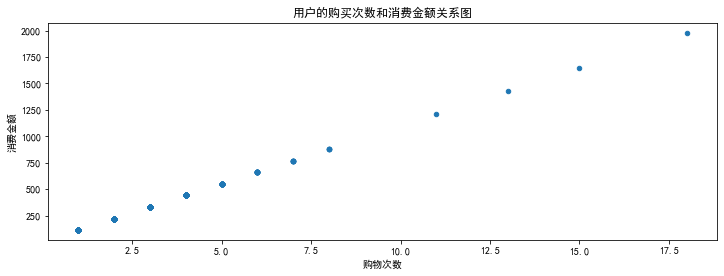

In [7]:
#按照游客分组，统计每个游客的购买次数
grouped_count_author = df.groupby('author')['frequency'].count().reset_index() 
#按照游客分组，统计每个游客的消费金额
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()
user_purchase_retention = pd.merge(left=grouped_count_author,
                                  right=grouped_sum_amount,
                                  on='author',
                                  how='inner')
user_purchase_retention.tail(60)
user_purchase_retention.plot.scatter(x='frequency',y='amount',figsize=(12,4))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购物次数')
plt.ylabel('消费金额')
#结论：斜率就是门票价格110，用户的消费金额和消费次数呈现线性关系

## b1.用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

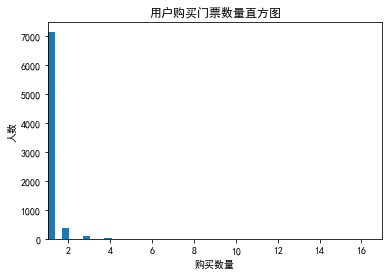

In [8]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)  #影响柱子的宽度，宽度= （最大值-最小值）/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
#绝大多数用户购买过1张门票，用户在7000人次左右
# 少数人购买过2~4张门票，猜测：可能是台北周边用户

## b2.用户购买门票2次及以上情况分析

Text(0.5, 1.0, '购买门票在2次及以上的用户数量')

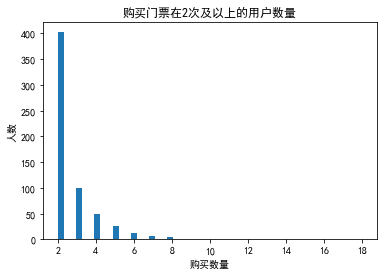

In [9]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2.head()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次及以上的用户数量')
#消费两次的用户在整体上占比较大，大于2次的用户占小部分，用户购买次数最多为8次

## b3.查看购买2次及以上的具体人数

In [10]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
#出去购买一次的顾客，可以看出购买2次有402人，购买3次的99人，以此类推得知大多数据倾向于购买2~5

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

## b4.购买次数在1~5次之间的用户占比分析

[7119, 402, 99, 49, 25]


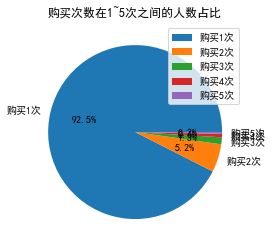

In [11]:
#1.按照用户进行分组  2.取出购买次数  3.过滤出1~5次用户  4.绘制饼图
df_frequency_gte_1 = df.groupby('author')['frequency'].count().reset_index()
#过滤出<=5次的用户
values = list(df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count())
print(values)
plt.pie(values,labels=['购买1次','购买2次','购买3次','购买4次','购买5次'],autopct='%1.1f%%')
plt.title('购买次数在1~5次之间的人数占比')
plt.legend()
#可以看出购买一次的占比83%，其次逐渐递减。并且递减比较明显，购买3.4.5的占比相近，人数都很少。

## b5.购买次数在2~5次之间的用户占比分析

[402, 99, 49, 25]


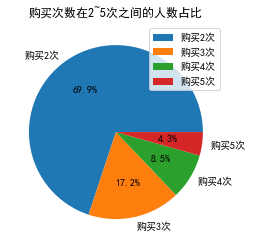

In [12]:
#过滤出>=2次并且<=5次的用户
df_frequency_gte_2 = df_frequency_2[df_frequency_2['frequency']>=2].reset_index()
values = list(df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].count())
print(values)
plt.pie(values,labels=['购买2次','购买3次','购买4次','购买5次'],autopct='%1.1f%%')
plt.title('购买次数在2~5次之间的人数占比')
plt.legend()
#在2~5次之间，购买2.3次用户占比最大，综合占据了80%

## c1.复购率分析

Text(0.5, 1.0, '16~19年每月用户复购率')

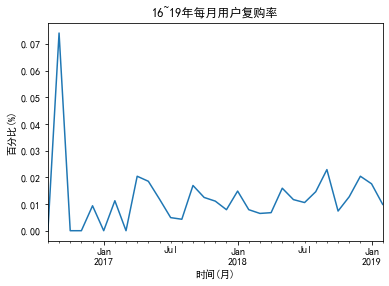

In [13]:
#复购率：在某一时间窗口内(多指一个月)内消费次数在两次及以上的用户在总消费用户的占比
df.head()
pivot_count = df.pivot_table(index='author',
                            columns='month',
                            values='frequency',
                            aggfunc='count').fillna(0)
pivot_count.head()
#三种情况：
#消费次数>1，为复购用户，用1表示
#消费次数=1，为非复购用户，用0表示
#消费次数=0, 未消费用户，用na表示
#applymap:df，处理每一个元素
#apply:df，处理每一行或者每一列数据
#map:Serise，处理每一个元素
pivot_count = pivot_count.applymap(lambda x: 1 if x>1 else np.NAN  if x==0 else 0)
# pivot_count[pivot_count['2016-09-01']==1]
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间(月)')
plt.ylabel('百分比(%)')
plt.title('16~19年每月用户复购率')
#16年9月份复购率最高达到了7.5%，然后开始下降，趋于平稳在1.2%

## c2.复购用户人数

Text(0.5, 1.0, '16~19年每月的复购人数折线图')

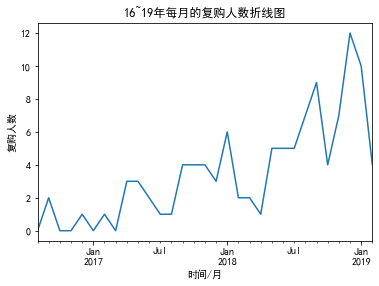

In [14]:
pivot_count.sum().plot()
plt.xlabel('时间/月')
plt.ylabel('复购人数')
plt.title('16~19年每月的复购人数折线图')
#整体来看，复购人数长线上升趋势
#但是在18年2.3.4.10和19年2月份，复购人数下降较为明显，出现异常信号，需要和业务部门具体分析情况

## c3.回购率分析

In [15]:
#回购率：在某一个时间窗口内消费过的用户，在下一个时间窗口仍旧消费的占比。
#举个例子：当前月消费用户人数1000人，其中200人在下一个月仍旧进行了消费，回购率200/1000=20%
pivot_purchase = df.pivot_table(index='author',
                columns='month',
               values='frequency',
               aggfunc='count'
              ).fillna(0)
pivot_purchase.head()
len(pivot_purchase.columns)

31

Text(0, 0.5, '回购率%')

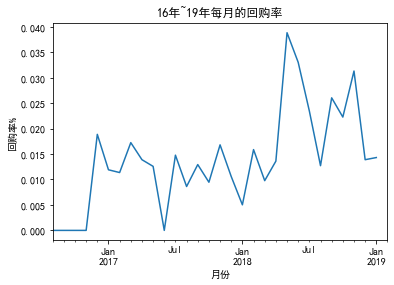

In [16]:
def purchase_return(data): #data:代表的是每一名游客的所有月份消费记录
    status = [] #存储每一个月回购状态
    for i in range(30):#遍历每一个月（最后一个月除外）
        ####本月消费
        if data[i] == 1:
            if data[i+1] ==1:#下个月有消费，是回购用户，1
                status.append(1)
            else:#na|未消费
                status.append(0) #非回购用户，0
        else: ####本月未消费
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,pivot_purchase.columns)
pivot_purchase_return = pivot_purchase.apply(purchase_return,axis=1)  #用户回购状态
(pivot_purchase_return.sum()/pivot_purchase_return.count()).plot()
plt.title('16年~19年每月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率%')
#回购率最高在18年6月份，达到4%
#整体来看，回购率呈现微弱上升趋势
#出现了几次较大下滑，分别是17年6月份，18年1月份，18年8月份，19年1月份

## c4.回购人数分析

month
2016-08-01     0.0
2016-09-01     0.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     2.0
2017-01-01     1.0
2017-02-01     1.0
2017-03-01     2.0
2017-04-01     2.0
2017-05-01     2.0
2017-06-01     0.0
2017-07-01     3.0
2017-08-01     2.0
2017-09-01     3.0
2017-10-01     3.0
2017-11-01     6.0
2017-12-01     4.0
2018-01-01     2.0
2018-02-01     4.0
2018-03-01     3.0
2018-04-01     2.0
2018-05-01    12.0
2018-06-01    14.0
2018-07-01    11.0
2018-08-01     6.0
2018-09-01    10.0
2018-10-01    12.0
2018-11-01    17.0
2018-12-01     8.0
2019-01-01     8.0
2019-02-01     0.0
dtype: float64


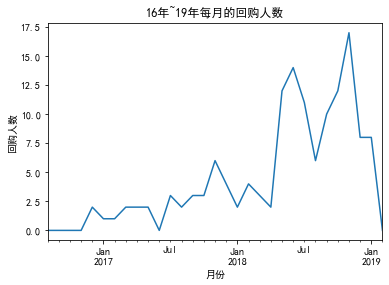

In [17]:
pivot_purchase_return.sum().plot()
plt.title('16年~19年每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')
print(pivot_purchase_return.sum())
#整体呈现上升趋势，回购人数最多时在18年11月份，人数未17人
#其中有几次回购人数下降较为明显，主要在分别是17年6月份，18年1月份，18年8月份，19年1月份

## c5.每个月分层用户占比情况

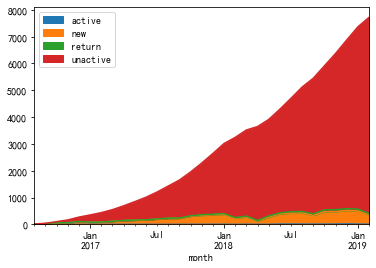

In [18]:
#活跃用户|不活跃用户|回流用户|新用户
def active_status(data): #data：每一行数据（共31列）
    status = [] #存储用户31个月的状态（new|active|unactive|return|unreg）
    for i in range(31):
        #判断本月没有消费==0
        if data[i] ==0:
            if len(status)==0: #前几个月没有任何记录（也就是97年1月==0）
                status.append('unreg')  
            else:#之前的月份有记录（判断上一个月状态）
                if status[i-1] =='unreg':#一直没有消费过
                    status.append('unreg')
                else:#上个月的状态可能是：new|active|unative|reuturn
                    status.append('unactive')
        else:#本月有消费==1
            if len(status)==0:
                status.append('new') #第一次消费
            else:#之前的月份有记录（判断上一个月状态）
                if status[i-1]=='unactive':
                    status.append('return') #前几个月不活跃，现在又回来消费了，回流用户
                elif  status[i-1]=='unreg':
                    status.append('new') #第一次消费
                else:#new|active
                    status.append('active') #活跃用户
            
    return pd.Series(status,pivot_purchase.columns) #值：status,列名：18个月份
pivot_purchase_status  =pivot_purchase.apply(active_status,axis=1)
pivot_status_count =pivot_purchase_status.replace('unreg',np.NaN).apply(pd.value_counts)
pivot_status_count.T.plot.area()
#可以看出，红色（不活跃用户）占据网站用户的主体
#橙色（新用户）从17年的1月~19年1月，呈现上升趋势；但是在18年4月份左右，新用户的量突然急剧下降，异常信号；
#以后，新用户又开始逐渐上涨，回复稳定状态
#绿色（回流用户），一直维持稳定稳定状态，但是在18年2~4月份,出现异常下降情况，异常信号；

## c6.每月不同用户的占比


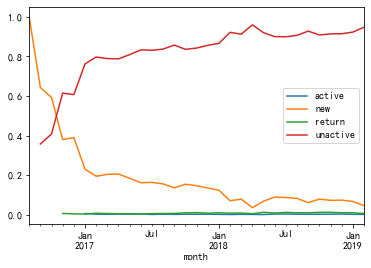

In [19]:
return_rate = pivot_status_count.apply(lambda x:x/x.sum())
return_rate.T.plot()
#在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始逐渐下降，并且趋于稳定，稳定在10%左右
#活跃用户和会用户，一直很稳定，并且占比较小
#16年9月前后，新用户和不活跃用户，发生较大的变化，猜测：活动或者节假日造成....

## c7.每月活跃用户的占比

Text(0.5, 1.0, '每月活跃用户的占比分析')

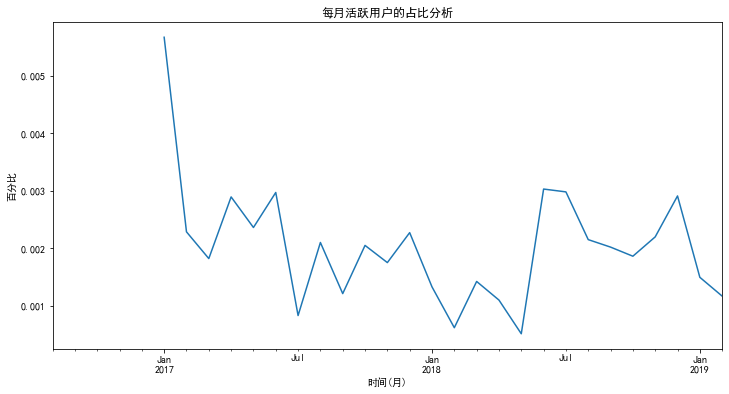

In [20]:
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每月活跃用户的占比分析')
#在17年1月份活跃用户占比较高，在0.5%，但是在1-2月份，急剧下降，猜测：春节的影响，或者温度
#结合历年1~2月份销量来看，都会出现一定比例的下降，再次验证我们的猜测：春节的影响
#在18年2月和5月出现异常，门票销量下降，猜测：雨水或者台风影响

## c8.每月回流用户占比

Text(0.5, 1.0, '每月回流用户的占比分析')

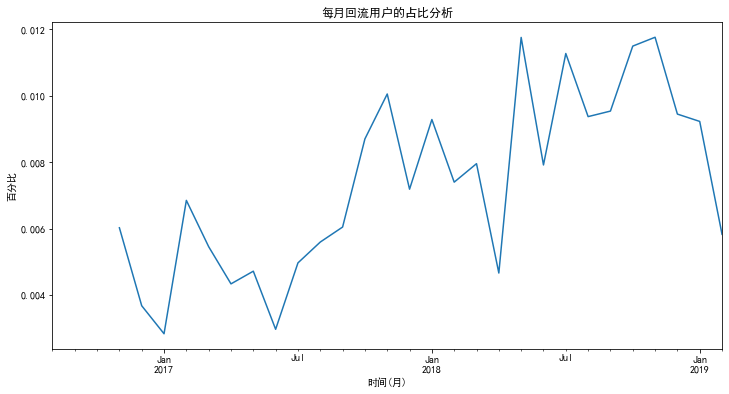

In [21]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每月回流用户的占比分析')
#整体来看，回流用户比例上升趋势，但是波动较大
#在17年1月和6月，18年4月，19年2月，回流用户比例都出现了较大幅度下降，表现为异常信号
#不论是回流用户还是活跃用户，在以上几个月份中都表现出下降趋势。

In [22]:
np.mean(return_rate.T['return'])  #回流用户平均值在0.73%左右
#在17年9月份以后，仅有连个异常点在平均值一下
#在17年9月份以前，所有数据都显示出回流用户比例低于平均值，猜测：景点开放不久，很多游客尚未发现本景点；本景点在该平台上线不久

0.00736823576229978

## d1.用户的生命周期

In [40]:
#计算方式：每一个用户最后一个购买商品的时间——用户第一次购买商品的时间，转换成天数，即为生命周期
time_min = df.groupby('author')['time'].min()
time_max = df.groupby('author')['time'].max()
life_time = (time_max-time_min).reset_index()
life_time.describe()
#通过原样本8757条和count=7722得知，存在一个用户多次消费的情况
#平均生命周期天数23天，通过25%  50%  75%分位数得知，绝大多用户生命周期为0天
#最大生命周期为864天


,time
count,7722
mean,23 days 01:45:32.867132
std,98 days 16:47:46.849668
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


## d2.用户生命周期直方图

                  author   time  life_time
0                wenbiao 0 days        0.0
1      Goh Yu Wen Eunice 0 days        0.0
2               Hui Shan 0 days        0.0
3                 Huihui 0 days        0.0
4               KO-CHENG 0 days        0.0
...                  ...    ...        ...
7717                  芊羽 0 days        0.0
7718                  華山 0 days        0.0
7719                   蘇 0 days        0.0
7720                  郁君 0 days        0.0
7721                  青慧 0 days        0.0

[7130 rows x 3 columns]


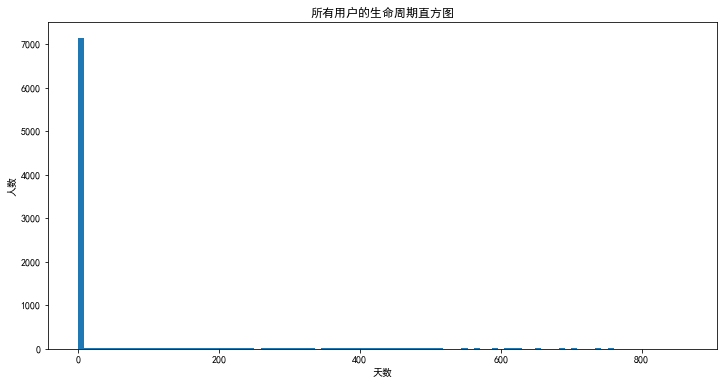

In [47]:
#讲日期类型转成数值类型
life_time['life_time'] = life_time['time']/np.timedelta64(1,'D')
life_time['life_time'].plot.hist(bins = 100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期直方图')
print(life_time[life_time['life_time']==0])
#生命周期为0的用户（仅仅在一天内有过消费，之后再没消费过），存在7130个用户
#由于总用户数为7722，其余592人属于优质的忠诚客户

## d3.生命周期大于0天的用户，直方图

300.9662162162162

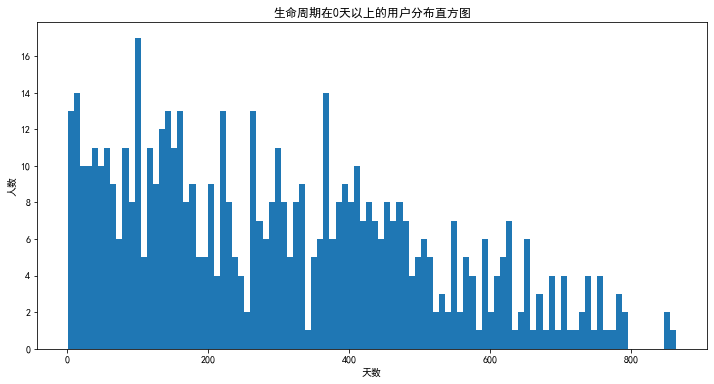

In [54]:
life_time[life_time['life_time']>0]['life_time'].plot.hist(bins = 100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('生命周期在0天以上的用户分布直方图')
life_time[life_time['life_time']>0]['life_time'].mean()
#去掉生命周期为0的用户，可知
#用户平均生命周期为300天,生命周期在100天的用户量达到了最大值17人
#生命周期在100~350天来看，用户量呈现缓慢下降的趋势
#350~800天左右来看，用户量下降速度明显，存在一定用户流失，而忠诚用户越来越少